In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [2]:
columns = ['datetime','choke','psig','apsig','oil','gas','water']
columns2 = ['choke','psig','apsig','oil','gas','water']

In [3]:
df_raw = pd.read_csv('final.csv')

# use 100 data only
# df_raw = df_raw.head(100)

df_raw = df_raw.set_index('datetime')

In [4]:
df_raw

,choke,psig,apsig,oil,gas,water
datetime,,,,,,
15/5/2021 21:00:00,38,935,320,698.880,4.980,23.616
15/5/2021 21:15:00,38,935,321,822.456,4.988,32.592
15/5/2021 21:30:00,38,940,318,661.368,5.070,26.208
15/5/2021 21:45:00,38,938,317,737.664,5.061,29.232
15/5/2021 22:00:00,38,940,319,661.368,5.078,26.208
...,...,...,...,...,...,...
4/6/2021 08:00:00,42,986,328,771.720,7.638,16.896
4/6/2021 08:15:00,42,984,325,766.032,7.602,16.704
4/6/2021 08:30:00,42,986,328,765.216,7.638,16.704


# normalization min max

In [5]:
def minmax_normalize(df):
    return (df - df.min()) / (df.max() - df.min())
    

In [6]:
df_normalized = df_raw.copy()
df_normalized[columns2] = minmax_normalize(df_normalized[columns2])

df_normalized

,choke,psig,apsig,oil,gas,water
datetime,,,,,,
15/5/2021 21:00:00,0.0,0.431034,0.444444,0.311858,0.080260,0.417431
15/5/2021 21:15:00,0.0,0.431034,0.472222,0.748918,0.082992,0.631881
15/5/2021 21:30:00,0.0,0.452586,0.388889,0.179187,0.110997,0.479358
15/5/2021 21:45:00,0.0,0.443966,0.361111,0.449028,0.107923,0.551606
15/5/2021 22:00:00,0.0,0.452586,0.416667,0.179187,0.113730,0.479358
...,...,...,...,...,...,...
4/6/2021 08:00:00,1.0,0.650862,0.666667,0.569476,0.988046,0.256881
4/6/2021 08:15:00,1.0,0.642241,0.583333,0.549359,0.975751,0.252294
4/6/2021 08:30:00,1.0,0.650862,0.666667,0.546473,0.988046,0.252294


In [7]:
df_normalized.describe()

,choke,psig,apsig,oil,gas,water
count,1878.000000,1878.000000,1878.000000,1878.000000,1878.000000,1878.000000
mean,0.373536,0.746895,0.666164,0.568969,0.655763,0.256388
std,0.384998,0.220544,0.183364,0.136035,0.256358,0.125876
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.659483,0.583333,0.466429,0.532275,0.233945
50%,0.500000,0.803879,0.666667,0.572023,0.764686,0.256881
75%,0.500000,0.922414,0.777778,0.670911,0.805328,0.275229
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
def plot_rows(df, columns, filename):
    fig, ax = plt.subplots(len(columns), 1, figsize=(10, 10))
    for i, column in enumerate(columns):
        ax[i].plot(df.index, df[column])
        # reduce x label
        ax[i].set_xticks(ax[i].get_xticks()[::300])
        # rotate label
        plt.setp(ax[i].xaxis.get_majorticklabels(), rotation=15)
        ax[i].set_title(column)
    # more spacing each axe
    fig.subplots_adjust(hspace=1)
    
    # store to csv
    plt.savefig(filename)
    plt.show()

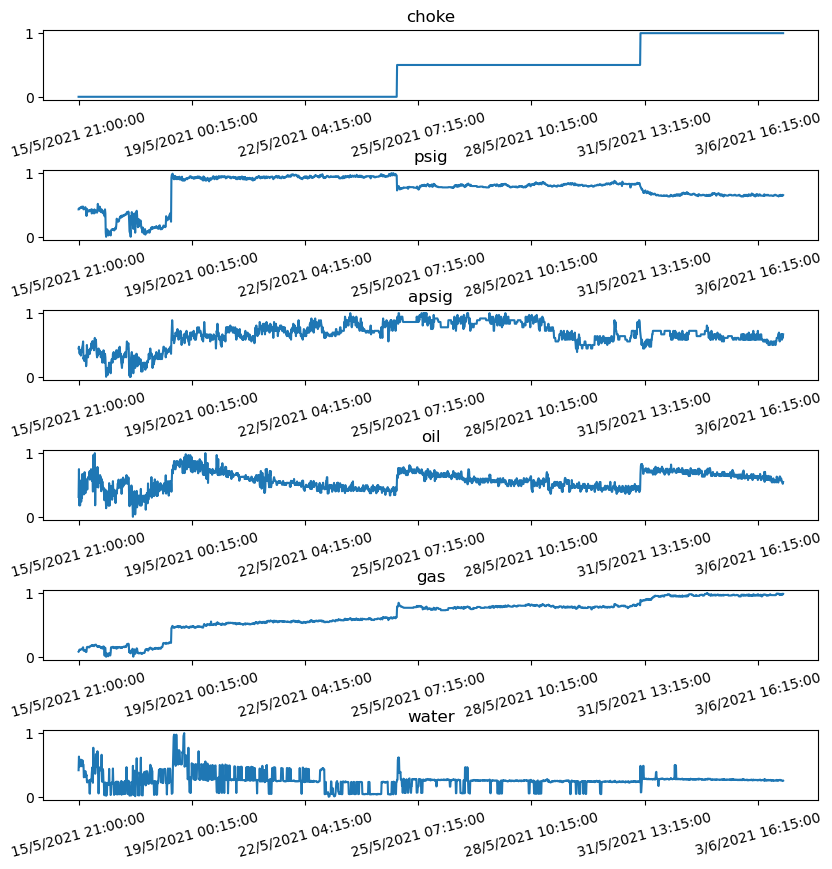

In [9]:
plot_rows(df_normalized, columns2, 'plot_rows_normalized')

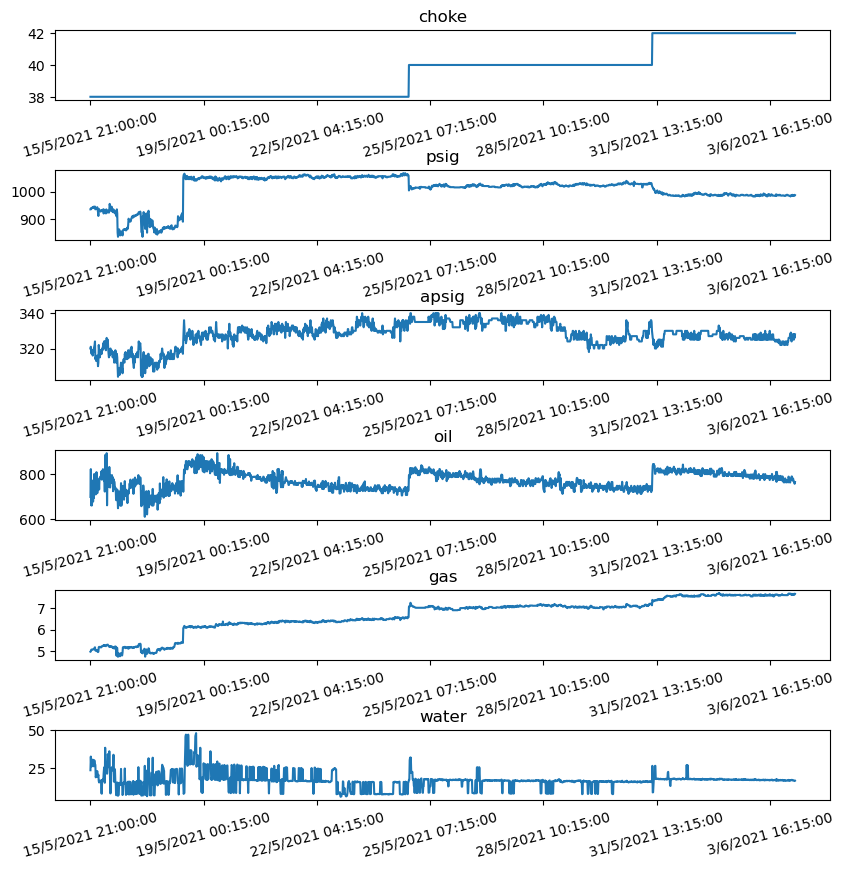

In [10]:
plot_rows(df_raw, columns2, 'plot_rows')

# Reference
- https://medium.com/analytics-vidhya/lstms-explained-a-complete-technically-accurate-conceptual-guide-with-keras-2a650327e8f2
- https://bobrupakroy.medium.com/multivariate-multistep-lstm-38d9536a6b2e

![lstm_model](lstm_model.png)


In [11]:
# get choke 38 only
df_choke_38 = df_raw[df_raw['choke'] == 38].copy()
df_choke_38.head()

,choke,psig,apsig,oil,gas,water
datetime,,,,,,
15/5/2021 21:00:00,38,935,320,698.880,4.980,23.616
15/5/2021 21:15:00,38,935,321,822.456,4.988,32.592
15/5/2021 21:30:00,38,940,318,661.368,5.070,26.208
15/5/2021 21:45:00,38,938,317,737.664,5.061,29.232
15/5/2021 22:00:00,38,940,319,661.368,5.078,26.208


In [12]:
scaler = MinMaxScaler()

In [13]:
df_choke_38_normalized = scaler.fit_transform(df_choke_38)
df_choke_38_normalized = pd.DataFrame(df_choke_38_normalized, columns=columns2)
df_choke_38_normalized['datetime'] = df_choke_38.index
df_choke_38_normalized = df_choke_38_normalized.set_index('datetime')
df_choke_38_normalized

,choke,psig,apsig,oil,gas,water
datetime,,,,,,
15/5/2021 21:00:00,0.0,0.431034,0.444444,0.311858,0.128135,0.417431
15/5/2021 21:15:00,0.0,0.431034,0.472222,0.748918,0.132497,0.631881
15/5/2021 21:30:00,0.0,0.452586,0.388889,0.179187,0.177208,0.479358
15/5/2021 21:45:00,0.0,0.443966,0.361111,0.449028,0.172301,0.551606
15/5/2021 22:00:00,0.0,0.452586,0.416667,0.179187,0.181570,0.479358
...,...,...,...,...,...,...
24/5/2021 16:00:00,0.0,0.978448,0.833333,0.341397,0.982007,0.220183
24/5/2021 16:15:00,0.0,0.987069,0.722222,0.432816,0.966739,0.041284
24/5/2021 16:30:00,0.0,0.965517,0.777778,0.464392,0.978190,0.043578


In [14]:
# sigmoid
def sigmoid(x):
    return 1 / (1 + math.exp(-x))
# sigmoid derivative
def sigmoid_derivative(x):
    return x * (1 - x)
# tanh
def tanh(x):
    return math.tanh(x)
# tanh derivative
def tanh_derivative(x):
    return 1.0 - x**2

In [15]:
# create simple LSTM cell no function and class
def simple_lstm_cell(inputs, h, c, Wf, Wi, Wc, Wo, bf, bi, bc, bo):
    """
    Implements a simple LSTM cell.

    Args:
        inputs (ndarray): Input array of shape (batch_size, input_size).
        h (ndarray): Hidden state array of shape (batch_size, hidden_size).
        c (ndarray): Cell state array of shape (batch_size, hidden_size).
        Wf (ndarray): Weight matrix for the forget gate of shape (input_size, hidden_size).
        Wi (ndarray): Weight matrix for the input gate of shape (input_size, hidden_size).
        Wc (ndarray): Weight matrix for the cell state of shape (input_size, hidden_size).
        Wo (ndarray): Weight matrix for the output gate of shape (input_size, hidden_size).
        bf (ndarray): Bias vector for the forget gate of shape (hidden_size,).
        bi (ndarray): Bias vector for the input gate of shape (hidden_size,).
        bc (ndarray): Bias vector for the cell state of shape (hidden_size,).
        bo (ndarray): Bias vector for the output gate of shape (hidden_size,).

    Returns:
        tuple: A tuple containing the updated hidden state (h) and cell state (c) arrays.
    """
    f = sigmoid(np.dot(inputs, Wf) + np.dot(h, bf))
    i = sigmoid(np.dot(inputs, Wi) + np.dot(h, bi))
    c_tilda = tanh(np.dot(inputs, Wc) + np.dot(h, bc))
    c = f * c + i * c_tilda
    o = sigmoid(np.dot(inputs, Wo) + np.dot(h, bo))
    h = o * tanh(c)
    return h, c

In [16]:
Wf = np.random.rand(6, 1)
Wi = np.random.rand(6, 1)
Wc = np.random.rand(6, 1)
Wo = np.random.rand(6, 1)
bf = np.random.rand(1)
bi = np.random.rand(1)
bc = np.random.rand(1)
bo = np.random.rand(1)

# print
# print('Wf:', Wf)
# print('Wi:', Wi)
# print('Wc:', Wc)
# print('Wo:', Wo)
# print('bf:', bf)
# print('bi:', bi)
# print('bc:', bc)
# print('bo:', bo)

# save weights as DataFrame
df_weights = pd.DataFrame({'Wf': Wf.flatten(), 'Wi': Wi.flatten(), 'Wc': Wc.flatten(), 'Wo': Wo.flatten()})
df_biases = pd.DataFrame({'bf': bf, 'bi': bi, 'bc': bc, 'bo': bo})

# save to .csv
df_weights.to_csv('weights.csv', index=False)
df_biases.to_csv('biases.csv', index=False)

display(df_weights)
display(df_biases)

,Wf,Wi,Wc,Wo
0,0.061040,0.653124,0.572778,0.677624
1,0.996069,0.297191,0.376302,0.747051
2,0.041303,0.839992,0.768346,0.474072
3,0.756569,0.442638,0.211787,0.601495
4,0.889440,0.075615,0.804569,0.311284
5,0.696659,0.306643,0.357699,0.313929


,bf,bi,bc,bo
0,0.78473,0.183279,0.505461,0.774142


In [17]:
cell = pd.DataFrame([], columns=['hidden state', 'cell state'])
# use function above
cell0 = simple_lstm_cell(
    df_choke_38_normalized.iloc[0].values,
    0,
    0,
    Wf,
    Wi,
    Wc,
    Wo,
    bf,
    bi,
    bc,
    bo
)

# create function to simplify code above line 19 and 22
def cell_append(self, new_cell):
    new_cell = pd.DataFrame([new_cell], columns=['hidden state', 'cell state'])
    return pd.concat([self, new_cell], ignore_index=True)
# append the first cell to the cell DataFrame
cell = cell_append(cell, cell0)

# print the updated cell DataFrame
cell

/tmp/ipykernel_26725/2598202548.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return 1 / (1 + math.exp(-x))
/tmp/ipykernel_26725/2598202548.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return math.tanh(x)
/tmp/ipykernel_26725/214509461.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return pd.concat([self, new_cell], ignore_index=True)


,hidden state,cell state
0,0.306875,0.463266


In [18]:
df_choke_38_normalized

,choke,psig,apsig,oil,gas,water
datetime,,,,,,
15/5/2021 21:00:00,0.0,0.431034,0.444444,0.311858,0.128135,0.417431
15/5/2021 21:15:00,0.0,0.431034,0.472222,0.748918,0.132497,0.631881
15/5/2021 21:30:00,0.0,0.452586,0.388889,0.179187,0.177208,0.479358
15/5/2021 21:45:00,0.0,0.443966,0.361111,0.449028,0.172301,0.551606
15/5/2021 22:00:00,0.0,0.452586,0.416667,0.179187,0.181570,0.479358
...,...,...,...,...,...,...
24/5/2021 16:00:00,0.0,0.978448,0.833333,0.341397,0.982007,0.220183
24/5/2021 16:15:00,0.0,0.987069,0.722222,0.432816,0.966739,0.041284
24/5/2021 16:30:00,0.0,0.965517,0.777778,0.464392,0.978190,0.043578


In [19]:
df_choke_38_normalized.iloc[0]

choke    0.000000
psig     0.431034
apsig    0.444444
oil      0.311858
gas      0.128135
water    0.417431
Name: 15/5/2021 21:00:00, dtype: float64

In [20]:
# cell 1
cell1 = simple_lstm_cell(
    df_choke_38_normalized.iloc[1].values,
    cell[['hidden state']].iloc[0].values[0],
    cell[['cell state']].iloc[0].values[0],
    Wf,
    Wi,
    Wc,
    Wo,
    bf,
    bi,
    bc,
    bo
)
# cell1
# # append the second cell to the cell DataFrame
cell = cell_append(cell, cell1)
cell

/tmp/ipykernel_26725/2598202548.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return 1 / (1 + math.exp(-x))
/tmp/ipykernel_26725/2598202548.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return math.tanh(x)


,hidden state,cell state
0,0.306875,0.463266
1,0.626228,1.019611


In [21]:
# what the result of that LSTM cell

#  create loop 
for i in range(2, len(df_choke_38_normalized)):
    new_cell = simple_lstm_cell(
        df_choke_38_normalized.iloc[i].values,
        cell[['hidden state']].iloc[-1].values[0],
        cell[['cell state']].iloc[-1].values[0],
        Wf,
        Wi,
        Wc,
        Wo,
        bf,
        bi,
        bc,
        bo
    )
    cell = cell_append(cell, new_cell)
    

/tmp/ipykernel_26725/2598202548.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return 1 / (1 + math.exp(-x))
/tmp/ipykernel_26725/2598202548.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return math.tanh(x)
/tmp/ipykernel_26725/2598202548.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return 1 / (1 + math.exp(-x))
/tmp/ipykernel_26725/2598202548.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error 

In [22]:
# create neural network from that LSTM cell
def simple_lstm(inputs, h, c, Wf, Wi, Wc, Wo, bf, bi, bc, bo):
    hidden_states = []
    for i in range(len(inputs)):
        h, c = simple_lstm_cell(
            inputs[i],
            h,
            c,
            Wf,
            Wi,
            Wc,
            Wo,
            bf,
            bi,
            bc,
            bo
        )
        hidden_states.append(h)
    return hidden_states

/tmp/ipykernel_26725/2598202548.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return 1 / (1 + math.exp(-x))
/tmp/ipykernel_26725/2598202548.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return math.tanh(x)


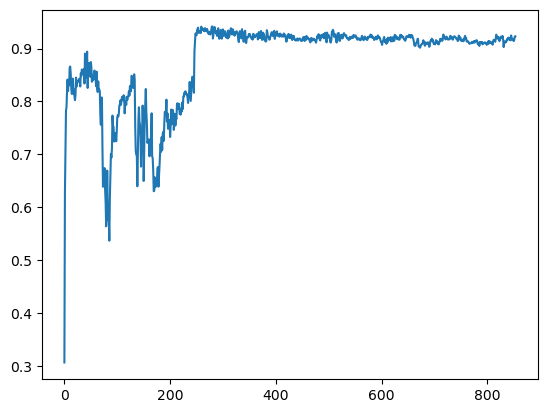

In [23]:
# use that function
hidden_states = simple_lstm(
    df_choke_38_normalized.values,
    0,
    0,
    Wf,
    Wi,
    Wc,
    Wo,
    bf,
    bi,
    bc,
    bo
)
# plot the hidden states
plt.plot(hidden_states)

In [24]:
# unroll prediction
def simple_lstm_unroll(inputs, h, c, Wf, Wi, Wc, Wo, bf, bi, bc, bo):
    hidden_states = []
    for i in range(len(inputs)):
        h, c = simple_lstm_cell(
            inputs[i],
            h,
            c,
            Wf,
            Wi,
            Wc,
            Wo,
            bf,
            bi,
            bc,
            bo
        )
        hidden_states.append(h)
    return hidden_states, h, c

In [25]:
lstm_unroll = simple_lstm_unroll(
    df_choke_38_normalized.values,
    0,
    0,
    Wf,
    Wi,
    Wc,
    Wo,
    bf,
    bi,
    bc,
    bo
)
print(lstm_unroll)

([0.30687534941676, 0.6262279740724185, 0.700551409397921, 0.7825068100585678, 0.7891071566367922, 0.8194637250573571, 0.8414863745800386, 0.8196713604554735, 0.8397373358439216, 0.8306330543088556, 0.8640170336159875, 0.8660772463126606, 0.8522037475033659, 0.8253733831511623, 0.8143402506338653, 0.8192462635554775, 0.8432766176374832, 0.8146726701023217, 0.822885956622692, 0.8108458533312917, 0.8025171782569502, 0.8117383104244926, 0.845122884210348, 0.8282797487214315, 0.8379563197345692, 0.8358980308899788, 0.8383862658116588, 0.8412391862149677, 0.841079785507245, 0.8432145745635399, 0.8284533008144026, 0.8530152184119792, 0.84793246889422, 0.8604253965074672, 0.8529364363566888, 0.8539995972888523, 0.8592980852857849, 0.8614036734514221, 0.8339712542908618, 0.8905496765340338, 0.8624146546184934, 0.8453010759267062, 0.8712631472414822, 0.8941763377546731, 0.8256072922157863, 0.8587275396738071, 0.8729322243774374, 0.8530043546462791, 0.8539591531008023, 0.8468190617204033, 0.8745

/tmp/ipykernel_26725/2598202548.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return 1 / (1 + math.exp(-x))
/tmp/ipykernel_26725/2598202548.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return math.tanh(x)


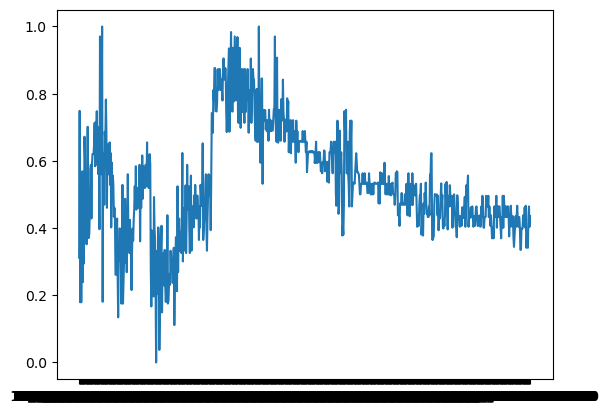

In [26]:
# plot
plt.plot(df_choke_38_normalized.index, df_choke_38_normalized['oil'], label='Actual')

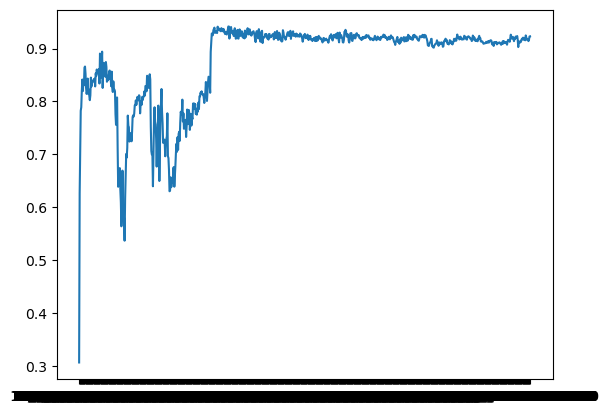

In [27]:
# plot
plt.plot(df_choke_38_normalized.index, lstm_unroll[0], label='Predicted')

In [28]:
lstm_unroll

([0.30687534941676,
  0.6262279740724185,
  0.700551409397921,
  0.7825068100585678,
  0.7891071566367922,
  0.8194637250573571,
  0.8414863745800386,
  0.8196713604554735,
  0.8397373358439216,
  0.8306330543088556,
  0.8640170336159875,
  0.8660772463126606,
  0.8522037475033659,
  0.8253733831511623,
  0.8143402506338653,
  0.8192462635554775,
  0.8432766176374832,
  0.8146726701023217,
  0.822885956622692,
  0.8108458533312917,
  0.8025171782569502,
  0.8117383104244926,
  0.845122884210348,
  0.8282797487214315,
  0.8379563197345692,
  0.8358980308899788,
  0.8383862658116588,
  0.8412391862149677,
  0.841079785507245,
  0.8432145745635399,
  0.8284533008144026,
  0.8530152184119792,
  0.84793246889422,
  0.8604253965074672,
  0.8529364363566888,
  0.8539995972888523,
  0.8592980852857849,
  0.8614036734514221,
  0.8339712542908618,
  0.8905496765340338,
  0.8624146546184934,
  0.8453010759267062,
  0.8712631472414822,
  0.8941763377546731,
  0.8256072922157863,
  0.85872753967380

In [29]:
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def lstm_forward(x, h_prev, c_prev, W_f, U_f, b_f, W_i, U_i, b_i, W_o, U_o, b_o, W_c, U_c, b_c):
    f_t = sigmoid(np.dot(x, W_f) + np.dot(h_prev, U_f) + b_f)
    i_t = sigmoid(np.dot(x, W_i) + np.dot(h_prev, U_i) + b_i)
    o_t = sigmoid(np.dot(x, W_o) + np.dot(h_prev, U_o) + b_o)
    c_tilde_t = np.tanh(np.dot(x, W_c) + np.dot(h_prev, U_c) + b_c)
    c_t = f_t * c_prev + i_t * c_tilde_t
    h_t = o_t * np.tanh(c_t)
    return h_t, c_t

def predict(h, c, W_out, b_out):
    return np.dot(h, W_out) + b_out

# Initialize learnable parameters
W_f = np.random.rand(6, 6)
U_f = np.random.rand(6, 6)
b_f = np.random.rand(6)
W_i = np.random.rand(6, 6)
U_i = np.random.rand(6, 6)
b_i = np.random.rand(6)
W_o = np.random.rand(6, 6)
U_o = np.random.rand(6, 6)
b_o = np.random.rand(6)
W_c = np.random.rand(6, 6)
U_c = np.random.rand(6, 6)
b_c = np.random.rand(6)
W_out = np.random.rand(6, 6)
b_out = np.random.rand(6)

# print
print('W_f:', W_f)
print('U_f:', U_f)
print('b_f:', b_f)
print('W_i:', W_i)
print('U_i:', U_i)
print('b_i:', b_i)
print('W_o:', W_o)
print('U_o:', U_o)
print('b_o:', b_o)
print('W_c:', W_c)
print('U_c:', U_c)
print('b_c:', b_c)
print('W_out:', W_out)
print('b_out:', b_out)

# save parameter as txt
text = f"W_f: {W_f}"
text += f"\nU_f: {U_f}"
text += f"\nb_f: {b_f}"
text += f"\nW_i: {W_i}"
text += f"\nU_i: {U_i}"
text += f"\nb_i: {b_i}"
text += f"\nW_o: {W_o}"
text += f"\nU_o: {U_o}"
text += f"\nb_o: {b_o}"
text += f"\nW_c: {W_c}"
text += f"\nU_c: {U_c}"
text += f"\nb_c: {b_c}"
text += f"\nW_out: {W_out}"
text += f"\nb_out: {b_out}"
with open('parameter.txt', 'w') as f:
    f.write(text)

# Initialize hidden state and cell state
h_prev = np.zeros((6,))
c_prev = np.zeros((6,))

predicted_scratch = np.array([])
# Perform forward pass and prediction
for t in range(len(df_choke_38_normalized.values)):
# for t in range(400):
    x_t = df_choke_38_normalized.values[t]
    h_t, c_t = lstm_forward(x_t, h_prev, c_prev, W_f, U_f, b_f, W_i, U_i, b_i, W_o, U_o, b_o, W_c, U_c, b_c)
    h_prev = h_t
    c_prev = c_t
    predicted_values = predict(h_t, c_t, W_out, b_out)
    # append array without flatten
    predicted_scratch = np.append(predicted_scratch, predicted_values)
    print(predicted_values)

W_f: [[0.45574092 0.29087003 0.90245294 0.09984452 0.34317275 0.52135144]
 [0.91392688 0.61610917 0.50744019 0.91076982 0.812356   0.70196843]
 [0.11049947 0.62686826 0.23660622 0.76668785 0.95757548 0.72396933]
 [0.23337458 0.25287776 0.92072556 0.57741088 0.70932242 0.01919331]
 [0.08785266 0.42556256 0.17996613 0.56501694 0.63543859 0.71049253]
 [0.4749965  0.19596272 0.68875004 0.79386273 0.90976892 0.5547275 ]]
U_f: [[0.2345878  0.77712383 0.81335335 0.29911139 0.38248486 0.93013725]
 [0.95902932 0.60098791 0.49177651 0.16849133 0.25577691 0.83570848]
 [0.07096531 0.84248182 0.68924587 0.59344564 0.25772794 0.01167826]
 [0.16437874 0.51563684 0.52099705 0.88153352 0.16928364 0.71916626]
 [0.44851581 0.33821565 0.67614067 0.9983672  0.26071929 0.82145624]
 [0.28701156 0.91568489 0.25355942 0.28661067 0.71611346 0.43516128]]
b_f: [0.73986724 0.11959624 0.41852115 0.41374694 0.63810189 0.56335864]
W_i: [[0.72492596 0.23951871 0.14740746 0.0882158  0.42027257 0.78198815]
 [0.17760096 

In [30]:
predicted_scratch_reshaped = np.reshape(predicted_scratch, (-1,6))
predicted_scratch_reshaped

array([[1.65980958, 0.7237336 , 2.46171227, 1.92677627, 2.19262673,
        0.97366119],
       [2.86168504, 1.36331093, 4.26601451, 3.44590072, 3.53799745,
        2.00045281],
       [3.14836975, 1.50915002, 4.70793871, 3.82024271, 3.85666366,
        2.23375907],
       ...,
       [3.23920583, 1.57255959, 4.83087236, 3.92044838, 3.96161943,
        2.31512486],
       [3.23293752, 1.56779333, 4.82272984, 3.91360498, 3.95369973,
        2.30963824],
       [3.23703296, 1.5710934 , 4.8279076 , 3.91788641, 3.95888785,
        2.31341392]])

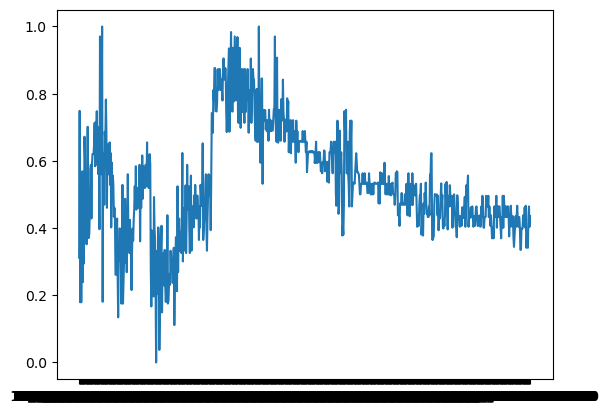

In [31]:
# plot predicted_scratch
plt.plot(df_choke_38_normalized.index, df_choke_38_normalized['oil'], label='Actual')

# FIRST STEP
mungkin ini yang terjadi kalau ambil hidden cellnya

ValueError: x and y must have same first dimension, but have shapes (854,) and (400,)

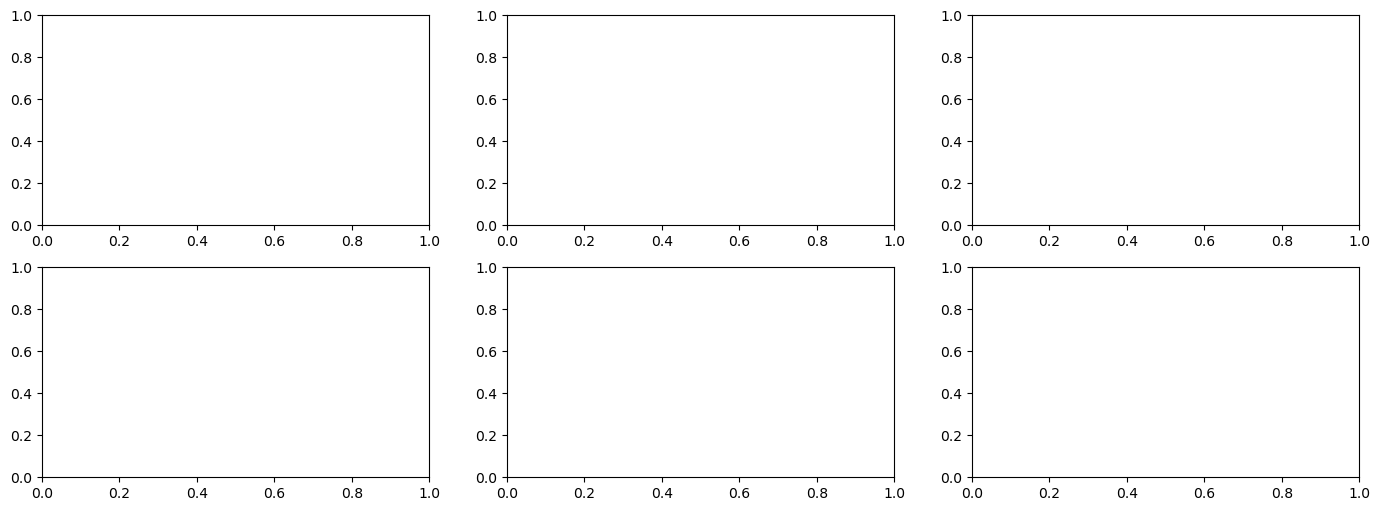

In [35]:
# plot predicted_scratch_reshaped
# plt.plot(range(predicted_scratch_reshaped.shape[0]), predicted_scratch_reshaped, label='Predicted')
fig, ax = plt.subplots(figsize=(17,6), nrows=2, ncols=3)
for i in range(6):
    ax[i//3, i%3].plot(range(1, df_choke_38_normalized.shape[0]+1), predicted_scratch_reshaped[:,i], label='end of hidden state')
    # ax[i//3, i%3].plot(range(1, 401), predicted_scratch_reshaped[:400,i], label='end of hidden state')
    ax[i//3, i%3].set_title(columns2[i])
    ax[i//3, i%3].set_xlabel('cell count')
    ax[i//3, i%3].set_ylabel('hidden state output')
    # add gap each axis

fig.suptitle('hidden state cell')
fig.tight_layout()
fig.show()

In [33]:
# how to predict in LSTM using hidden state
def predict(h, c, W_out, b_out):
    return np.dot(h, W_out) + b_out

# predict
predicted_values = predict(h_t, c_t, W_out, b_out)
predicted_values

array([3.23703296, 1.5710934 , 4.8279076 , 3.91788641, 3.95888785,
       2.31341392])

In [34]:
# denormalized
predicted_values_denormalized = scaler.inverse_transform([predicted_values])
predicted_values_denormalized

array([[  41.23703296, 1199.49366767,  477.8046736 , 1718.46287568,
          12.00560032,  102.97425303]])